## FSL course: https://open.win.ox.ac.uk/pages/fslcourse/website/index.html
### Installation : https://fsl.fmrib.ox.ac.uk/fsl/fslwiki/FslInstallation

In [4]:
import shutil, os
import os.path
import glob

Directory architecture:

coreg_github/

    |__seg
    |__t1
    |__rcbv
   

In [2]:
path = "/Users/busebuz/Desktop/coreg_github/"
FLIRT_DIR = "/Users/busebuz/fsl/bin/flirt"

os.chdir(path+ "rcbv/")

In [1]:
for files in glob.glob("*RCBV.nii"): 
    fname = files.split("_")
    #print(fname)
    ref = path + "rcbv/" + fname[0] + "_RCBV.nii"
    img = path + "t1/" + fname[0] + "_T1post.nii"
    seg = path + "seg/" + fname[0] + "_T1_CE_NEC.nii"

    coreg = path + fname[0] + "_t1_rcbv_fsl.nii.gz"
    coreg_roi = path + fname[0] + "_t1_rcbv_roi_fsl.nii.gz"
    mat = path + fname[0] + "_t1_rcbv_fsl.mat"
    
    os.system(FLIRT_DIR + " -in " + img + " -ref " + ref + " -out " + coreg + " -omat " + mat 
              + " -bins 256 -cost mutualinfo -searchrx -90 90 -searchry -90 90 -searchrz -90 90 -dof 12  -interp nearestneighbour")
    os.system(FLIRT_DIR + " -applyxfm -init " + mat + " -in " + seg + " -ref " + ref + " -out "
              + coreg_roi + " -interp nearestneighbour")
    
    

NameError: name 'glob' is not defined

In [6]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [19]:
os.chdir(path)
coreg = nib.load('S0136_t1_rcbv_fsl.nii.gz')
coreg_arr = np.array(coreg.dataobj)

ref = nib.load('rcbv/S0136_RCBV.nii')
ref_arr = np.array(ref.dataobj)

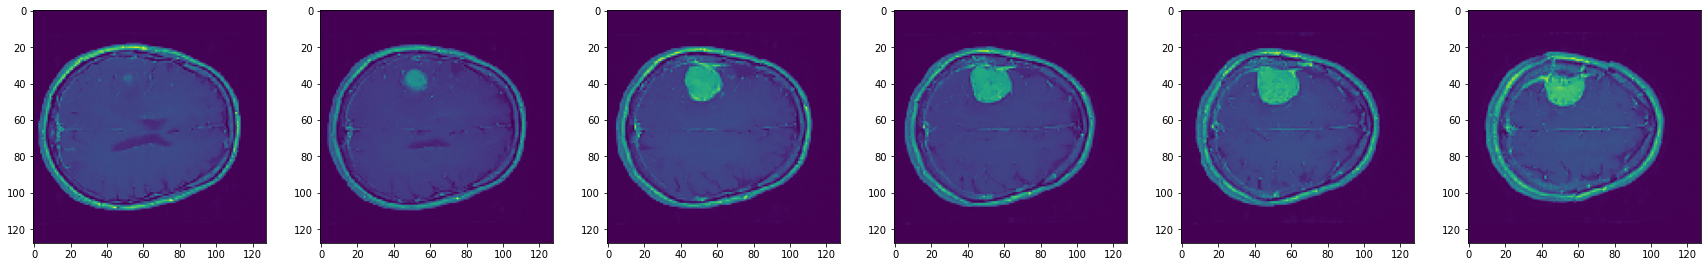

In [15]:
for i in range(6):
    plt.subplot(6, 6,i + 1)
    plt.imshow(coreg_arr[:,:,8 + i])
    plt.gcf().set_size_inches(30, 30)
plt.show()


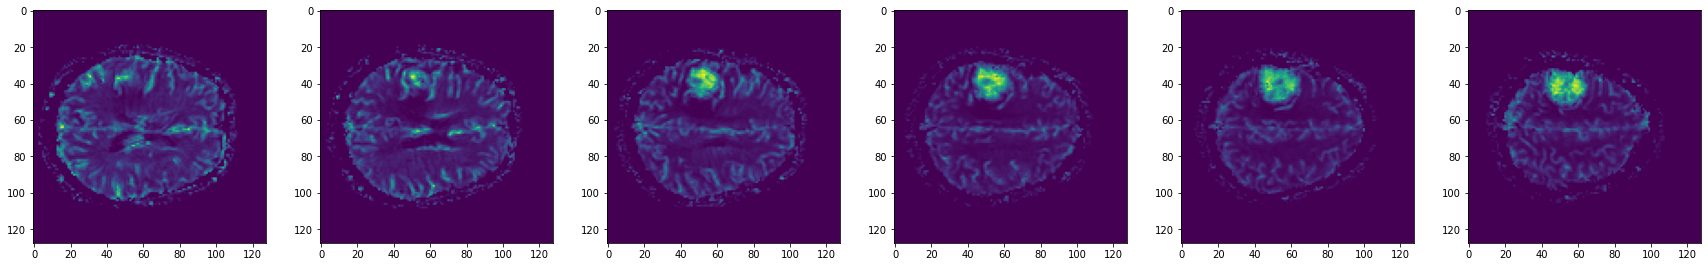

In [20]:
for i in range(6):
    plt.subplot(6, 6,i + 1)
    plt.imshow(ref_arr[:,:,8 + i])
    plt.gcf().set_size_inches(30, 30)
plt.show()